In [33]:
import numpy as np

In [34]:
import pandas as pd

In [35]:
hours = np.array([3, 3, 7, 2, 8])
marks = np.array([50, 77, 97, 44, 82])
grades = np.ceil(marks/10)
grades.size
grades[4] # one index lower for python

9.0

In [36]:
grades.mean()

7.4

In [37]:
studentData = np.array([hours, marks, grades])

In [38]:
avgStudyHours = studentData[0].mean()

In [39]:
avgGrade = studentData[2].mean()

In [40]:
print(f'Average Study Time: {avgStudyHours}\n' +
    f'Average Grade: {avgGrade}')

Average Study Time: 4.6
Average Grade: 7.4


In [41]:
studentName = ['Don', 'Juan', 'Pokemon', 'Bulbasaur', 'PandaBear']

In [42]:
df = pd.DataFrame({'Name' : studentName,
                'StudyHours' : hours,
                'Points' : marks,
                'Grades' : grades})

In [43]:
avgStudyHours1 = np.mean(df.StudyHours)

In [44]:
df1 = df[df.StudyHours > np.mean(df.StudyHours)]

In [45]:
passed = pd.Series(df.Grades >= 6)
dfResult = pd.concat([df, passed.rename('Passed')], axis=1)
dfResult.groupby(dfResult.Passed).Name.count()
dfResult.groupby(dfResult.Passed)[['Grades', 'StudyHours']].mean() # had to make a 'list' of columnn names inside the square brackets representing the set of columns to be used.
dfResult.sort_values('StudyHours')

,Name,StudyHours,Points,Grades,Passed
3,Bulbasaur,2,44,5.0,False
0,Don,3,50,5.0,False
1,Juan,3,77,8.0,True
2,Pokemon,7,97,10.0,True
4,PandaBear,8,82,9.0,True


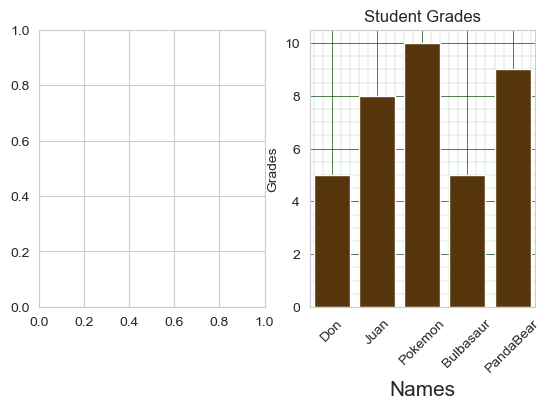

In [51]:

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot
# ax = sns.barplot(x=df.Name, y=df.Grades, color='crimson')
figure_scale = 0.5
default_fig_size = np.array([12.8, 7.2])
# fig = plt.figure(figsize=figure_scale*default_fig_size)
fig, ax = plt.subplots(1, 2, figsize=figure_scale*default_fig_size)
ax[0] = sns.barplot(x=df.Name, y=df.Grades, color="xkcd:brown")
ax0 = ax[0]

ax0.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax0.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax0.grid(which='major', color="xkcd:darkgreen", linewidth=0.5)
ax0.grid(which='minor', color='darkgreen', linewidth=0.1)
# # Set labels and title
ax0.set_xlabel('Names', size=15)
ax0.set_ylabel('Grades')
ax0.set_title('Student Grades')
ax0.set_xticklabels(dfResult.Name, rotation=45)
# plt.xticks(rotation=45)


plt.show()
